In [2]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

### 关于cartopy 和 hatch的绘制思路，先绘制地图再绘制阴影。双图叠加。可用函数包括两个
参考帖子：
https://github.com/bradyrx/esmtools/issues/13
https://geoclimatologyblog.wordpress.com/2020/03/28/monthly-averages-of-precipitation-for-cpc-ncep-precipitation-files-land-and-ocean-using-python/
https://stackoverflow.com/questions/41664850/hatch-area-using-pcolormesh-in-basemap

In [5]:
filename='197901.nc'
data = Dataset(filename)
print(data.variables.keys())


dict_keys(['precipitation', 'time', 'lon', 'lat'])


In [22]:
prec = data.variables['precipitation'][:]
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]
print(prec.shape)
prec


(31, 1800, 3600)


masked_array(
  data=[[[1.67, 1.67, 1.67, ..., 1.81, 1.81, 1.81],
         [1.67, 1.67, 1.67, ..., 1.81, 1.81, 1.81],
         [1.82, 1.82, 1.8 , ..., 1.93, 1.93, 1.93],
         ...,
         [0.02, 0.02, 0.02, ..., 0.  , 0.  , 0.  ],
         [0.02, 0.02, 0.02, ..., 0.  , 0.  , 0.  ],
         [0.02, 0.02, 0.02, ..., 0.  , 0.  , 0.  ]],

        [[2.13, 2.13, 2.13, ..., 2.  , 2.  , 2.  ],
         [2.13, 2.13, 2.13, ..., 2.  , 2.  , 2.  ],
         [1.74, 1.74, 1.74, ..., 1.63, 1.63, 1.63],
         ...,
         [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]],

        [[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
         ...,
         [0.04, 0.04, 0.04, ..., 0.  , 0.  , 0.  ],
         [0.04, 0.03, 0.03, ..., 0.  , 0.  , 0.  ],
         [0.04, 0.04, 0.04, ..., 0.  , 0.  , 0.  ]],

  

In [34]:
#calcualte the total month precip
prec_sum=np.sum(prec,axis=0)
print(prec_sum.shape)
prec_sum

(1800, 3600)


masked_array(
  data=[[7.13      , 7.13      , 7.13      , ..., 7.2699995 , 7.2699995 ,
         7.2699995 ],
        [7.13      , 7.13      , 7.13      , ..., 7.2699995 , 7.2699995 ,
         7.2699995 ],
        [7.53      , 7.53      , 7.52      , ..., 7.6099997 , 7.6099997 ,
         7.6099997 ],
        ...,
        [0.67999995, 0.61      , 0.58      , ..., 0.08      , 0.08      ,
         0.08      ],
        [0.64      , 0.53999996, 0.53999996, ..., 0.06      , 0.06      ,
         0.06      ],
        [0.6999999 , 0.67999995, 0.67999995, ..., 0.08      , 0.08      ,
         0.08      ]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [46]:
prec_sum

masked_array(
  data=[[7.13      , 7.13      , 7.13      , ..., 7.2699995 , 7.2699995 ,
         7.2699995 ],
        [7.13      , 7.13      , 7.13      , ..., 7.2699995 , 7.2699995 ,
         7.2699995 ],
        [7.53      , 7.53      , 7.52      , ..., 7.6099997 , 7.6099997 ,
         7.6099997 ],
        ...,
        [0.67999995, 0.61      , 0.58      , ..., 0.08      , 0.08      ,
         0.08      ],
        [0.64      , 0.53999996, 0.53999996, ..., 0.06      , 0.06      ,
         0.06      ],
        [0.6999999 , 0.67999995, 0.67999995, ..., 0.08      , 0.08      ,
         0.08      ]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [48]:
#判断是否有nan
print(np.any(np.isnan(prec_sum)))

True


In [49]:
prec_sum_mean=np.mean(prec_sum, axis=0)
prec_sum_mean
for i in prec_sum_mean:
    print(i)

116.11452
115.37728
113.0233
112.40163
112.06463
112.38397
111.962585
111.47247
111.0579
110.89703
111.08346
111.757416
109.6762
109.75399
109.62094
109.110756
109.36047
106.68694
106.946815
107.0226
107.59285
107.63932
105.072266
105.282646
105.132484
104.78868
104.63552
104.554695
103.01776
102.87745
102.70819
102.64875
102.983894
100.098274
100.13913
100.375175
100.330414
101.01827
101.08818
98.913055
98.615
98.81346
99.20178
99.288246
99.26723
99.89797
99.94652
99.78631
99.76965
99.75642
100.60797
100.55658
100.59348
100.613335
100.68909
100.759
101.71751
102.68855
102.66023
102.571594
102.25996
102.67352
103.270645
103.10003
102.9638
102.44139
102.38483
105.01914
104.56321
104.22286
104.0503
103.761345
103.270966
103.54999
103.54333
101.95029
101.54013
101.313446
100.09336
99.77585
99.99085
99.932686
100.14621
99.9263
99.40101
99.08939
98.856544
98.76102
98.62838
98.588104
99.4537
99.5398
99.8502
99.76777
99.53959
100.88606
100.942856
101.25868
101.14949
100.9544
101.09701
101.119

47.833847
47.728226
47.79271
47.735867
47.905846
47.937664
48.20869
48.895203
48.92708
49.028126
49.216484
48.619198
48.92871
49.063602
49.32796
49.188988
49.59892
49.885227
50.230843
50.541798
50.564026
51.112106
52.57537
53.048916
53.41151
52.90919
52.677994
52.6139
53.157825
52.88747
52.46623
52.12813
52.133408
50.91083
50.745502
50.702374
50.549824
51.146954
51.02703
49.378376
49.35221
49.32072
50.90386
50.977436
51.135265
49.68952
49.664146
51.539906
51.445755
51.517338
49.914932
50.007114
51.72971
51.75583
51.648624
50.310276
50.07542
50.38151
50.367786
50.34293
51.142414
51.759922
51.00713
50.80355
50.696144
50.785824
50.596546
49.630947
49.661663
49.597626
49.589237
49.591557
49.243202
49.091274
49.18652
49.381367
49.448925
51.37475
52.50463
52.569504
52.821293
52.833603
52.62938
52.662014
54.11497
53.75895
53.88773
53.1191
52.971893
53.028362
53.478004
53.26047
50.480003
50.580994
50.716595
52.702866
52.886642
50.15092
50.197662
50.237083
50.877785
52.4012
50.88206
51.050415
5

In [23]:
prec[0,:,:]

masked_array(
  data=[[1.67, 1.67, 1.67, ..., 1.81, 1.81, 1.81],
        [1.67, 1.67, 1.67, ..., 1.81, 1.81, 1.81],
        [1.82, 1.82, 1.8 , ..., 1.93, 1.93, 1.93],
        ...,
        [0.02, 0.02, 0.02, ..., 0.  , 0.  , 0.  ],
        [0.02, 0.02, 0.02, ..., 0.  , 0.  , 0.  ],
        [0.02, 0.02, 0.02, ..., 0.  , 0.  , 0.  ]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

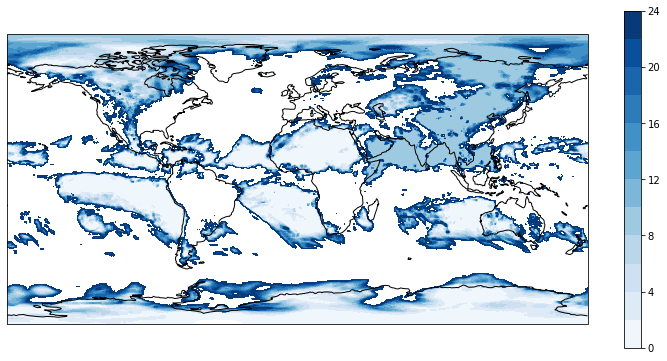

In [42]:
plt.figure(figsize=(13,6.2))
prec_cyc, lon_cyc = add_cyclic_point(prec_sum, coord=lon)
ax = plt.subplot(111, projection=ccrs.PlateCarree())
mm = ax.contourf(lon_cyc,\
                                 lat,\
                                 prec_cyc,\
                                 levels,\
                                 transform=ccrs.PlateCarree(),
                 cmap='Blues'
                )
                                 
ax.coastlines(resolution='110m')
plt.colorbar(mm, ax=ax, orientation='vertical')
plt.show()

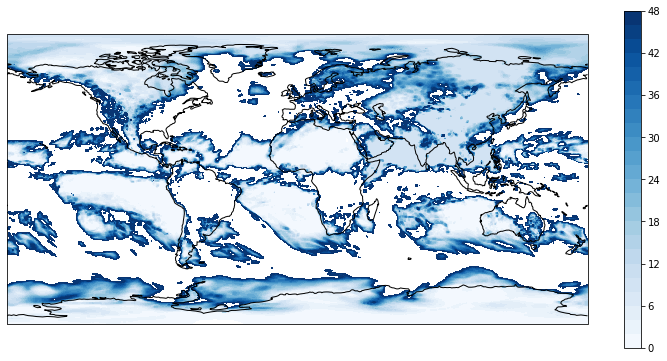

In [44]:
vrange = [0,48]
vstep = 2.0
levels = np.arange(vrange[0], vrange[1]+vstep, vstep)
levels
##
plt.figure(figsize=(13,6.2))
prec_cyc, lon_cyc = add_cyclic_point(prec_sum, coord=lon)
ax = plt.subplot(111, projection=ccrs.PlateCarree())
mm = ax.contourf(lon_cyc,\
                                 lat,\
                                 prec_cyc,\
                                 levels,\
                                 transform=ccrs.PlateCarree(),
                 cmap='Blues'
                )
                                 
ax.coastlines(resolution='110m')
plt.colorbar(mm, ax=ax, orientation='vertical')
plt.show()

https://stackoverflow.com/questions/41664850/hatch-area-using-pcolormesh-in-basemap
https://github.com/bradyrx/esmtools/issues/13

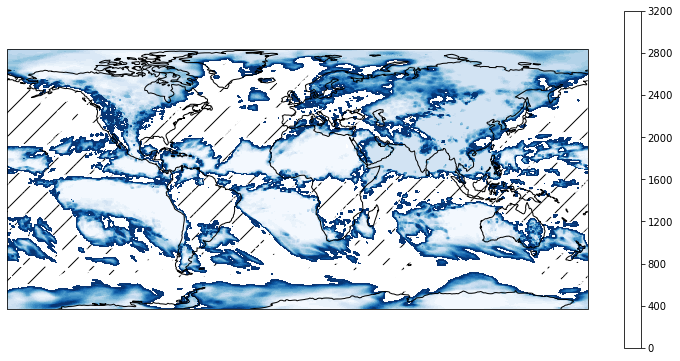

In [81]:
#mask the array less then 120
# mask=prec_sum
mask=np.ma.masked_less(prec_sum,120)
mask
##
vrange = [0,48]
vstep = 2.0
levels = np.arange(vrange[0], vrange[1]+vstep, vstep)
levels
##
plt.figure(figsize=(13,6.2))
prec_cyc, lon_cyc = add_cyclic_point(prec_sum, coord=lon)
ax = plt.subplot(111, projection=ccrs.PlateCarree())
mm = ax.contourf(lon_cyc,\
                                 lat,\
                                 prec_cyc,\
                                 levels,\
                                 transform=ccrs.PlateCarree(),
                 cmap='Blues'
                )
ax.coastlines(resolution='110m')
mm = ax.contourf(lon,\
                                 lat,\
                
                 mask,\
                  
#                  levels,\
                                  
                 hatches='/',\
                                 
                                 transform=ccrs.PlateCarree(),
                 cmap='Blues',
                 alpha=0
                )
                                 

plt.colorbar(mm, ax=ax, orientation='vertical')
plt.show()

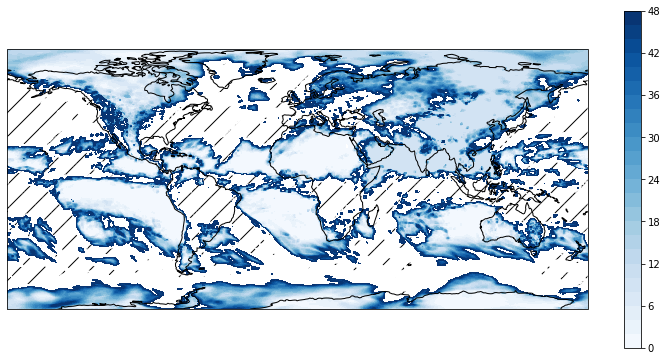

In [82]:
#mask the array less then 120
# mask=prec_sum
mask=np.ma.masked_less(prec_sum,120)
mask
##
vrange = [0,48]
vstep = 2.0
levels = np.arange(vrange[0], vrange[1]+vstep, vstep)
levels
##
plt.figure(figsize=(13,6.2))
prec_cyc, lon_cyc = add_cyclic_point(prec_sum, coord=lon)
ax = plt.subplot(111, projection=ccrs.PlateCarree())
mm = ax.contourf(lon_cyc,\
                                 lat,\
                                 prec_cyc,\
                                 levels,\
                                 transform=ccrs.PlateCarree(),
                 cmap='Blues'
                )
ax.coastlines(resolution='110m')
mm2 = ax.contourf(lon,\
                                 lat,\
                
                 mask,\
                  
#                  levels,\
                                  
                 hatches='/',\
                                 
                                 transform=ccrs.PlateCarree(),
                 cmap='Blues',
                 alpha=0
                )
                                 

plt.colorbar(mm, ax=ax, orientation='vertical')
plt.show()

TypeError: Length of x (3601) must match number of columns in z (3600)

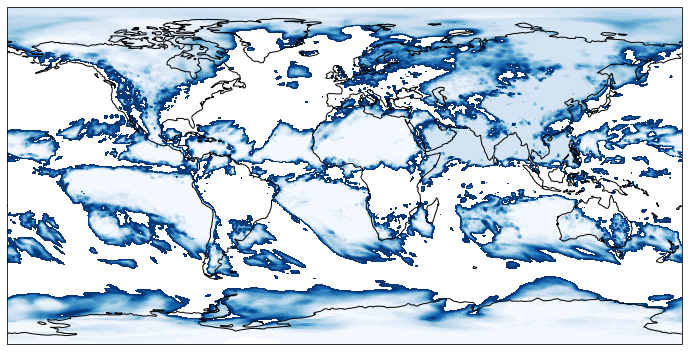

In [83]:
#mask the array less then 120
# mask=prec_sum
mask=np.ma.masked_less(prec_sum,120)
mask
##
vrange = [0,48]
vstep = 2.0
levels = np.arange(vrange[0], vrange[1]+vstep, vstep)
levels
##
plt.figure(figsize=(13,6.2))
prec_cyc, lon_cyc = add_cyclic_point(prec_sum, coord=lon)
ax = plt.subplot(111, projection=ccrs.PlateCarree())
mm = ax.contourf(lon_cyc,\
                                 lat,\
                                 prec_cyc,\
                                 levels,\
                                 transform=ccrs.PlateCarree(),
                 cmap='Blues'
                )
ax.coastlines(resolution='110m')
mm2 = ax.contourf(
#     lon_cyc,在绘制图的时候这个不能再用这个lon_cyc 因为格式和数据对不上
                                 lat,\
                
                 mask,\
                  
#                  levels,\
                                  
                 hatches='x',\
                                 
                                 transform=ccrs.PlateCarree(),
                 cmap='Blues',
                 alpha=0
                )
                                 

plt.colorbar(mm, ax=ax, orientation='vertical')
plt.show()

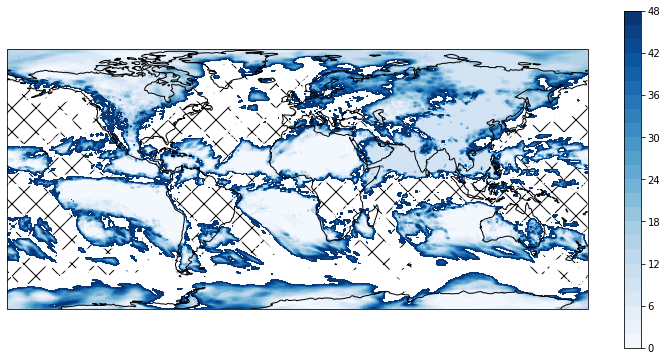

In [86]:
#mask the array less then 120
# mask=prec_sum
mask=np.ma.masked_less(prec_sum,120)
mask
##
vrange = [0,48]
vstep = 2.0
levels = np.arange(vrange[0], vrange[1]+vstep, vstep)
levels
##
plt.figure(figsize=(13,6.2))
prec_cyc, lon_cyc = add_cyclic_point(prec_sum, coord=lon)
mask_cyc, mask_lon_cyc = add_cyclic_point(mask, coord=lon)
ax = plt.subplot(111, projection=ccrs.PlateCarree())
mm = ax.contourf(lon_cyc,\
                                 lat,\
                                 prec_cyc,\
                                 levels,\
                                 transform=ccrs.PlateCarree(),
                 cmap='Blues'
                )
ax.coastlines(resolution='110m')
mm2 = ax.contourf(mask_lon_cyc,
#     lon_cyc,在绘制图的时候这个不能再用这个lon_cyc 因为格式和数据对不上
                                 lat,\
                
                 mask_cyc,\
                  
#                  levels,\
                                  
                 hatches='x',\
                                 
                                 transform=ccrs.PlateCarree(),
                 cmap='Blues',
                 alpha=0
                )
                                 

plt.colorbar(mm, ax=ax, orientation='vertical')
plt.show()

TypeError: Length of x (3601) must match number of columns in z (3600)

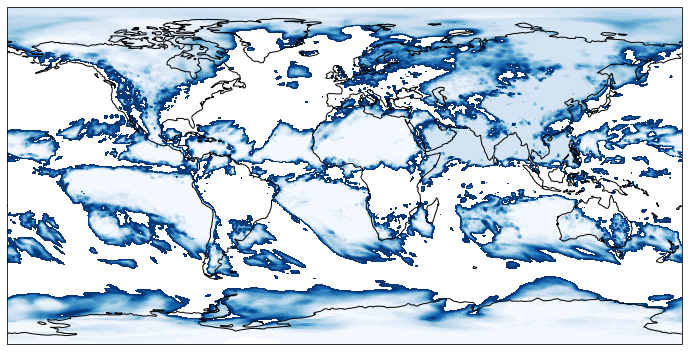

In [84]:
#mask the array less then 120
# mask=prec_sum
mask=np.ma.masked_less(prec_sum,120)
mask
##
vrange = [0,48]
vstep = 2.0
levels = np.arange(vrange[0], vrange[1]+vstep, vstep)
levels
##
plt.figure(figsize=(13,6.2))
prec_cyc, lon_cyc = add_cyclic_point(prec_sum, coord=lon)
ax = plt.subplot(111, projection=ccrs.PlateCarree())
mm = ax.contourf(lon_cyc,\
                                 lat,\
                                 prec_cyc,\
                                 levels,\
                                 transform=ccrs.PlateCarree(),
                 cmap='Blues'
                )
ax.coastlines(resolution='110m')
mm2 = ax.contourf(lon_cyc,\
                                 lat,\
                
                 mask,\
                  
#                  levels,\
                                  
                 hatches='x',\
                 color="none",edgecolor='black',\
                                 
                                 transform=ccrs.PlateCarree(),
                 cmap='Blues',
                 alpha=0
                )
                                 

plt.colorbar(mm, ax=ax, orientation='vertical')
plt.show()

In [77]:
levels

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
       26., 28., 30., 32., 34., 36., 38., 40., 42., 44., 46., 48.])

C:\D\software\anaconda\anaconda_install\envs\hydrogr\lib\site-packages\cartopy\mpl\geoaxes.py:1887: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


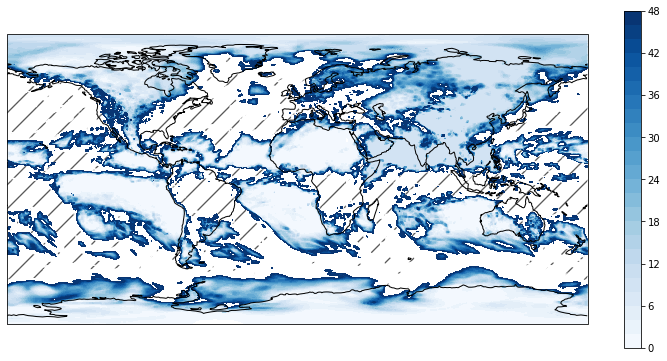

In [63]:

vrange = [0,48]
vstep = 2.0
levels = np.arange(vrange[0], vrange[1]+vstep, vstep)
levels
# mask=prec_sum
mask=np.ma.masked_less(prec_sum,120)

##
plt.figure(figsize=(13,6.2))
prec_cyc, lon_cyc = add_cyclic_point(prec_sum, coord=lon)
ax = plt.subplot(111, projection=ccrs.PlateCarree())

mm = ax.contourf(lon_cyc,\
                                 lat,\
                                 prec_cyc,\
                                 levels,\
                                 transform=ccrs.PlateCarree(),
                 cmap='Blues'
                )
m=plt.pcolor(lon_cyc, lat, mask, hatch='/', alpha=0.)                              
ax.coastlines(resolution='110m')#'Valid scales are "110m", "50m", and "10m".'   
plt.colorbar(mm, ax=ax, orientation='vertical')
plt.show()

In [71]:
np.nanmax(mask)
          

3106.3696

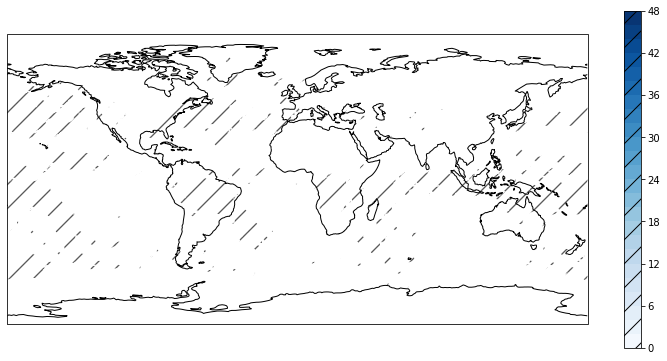

In [65]:
vrange = [0,48]
vstep = 2.0
levels = np.arange(vrange[0], vrange[1]+vstep, vstep)
levels
# mask=prec_sum
mask=np.ma.masked_less(prec_sum,120)

##
plt.figure(figsize=(13,6.2))
prec_cyc, lon_cyc = add_cyclic_point(prec_sum, coord=lon)
ax = plt.subplot(111, projection=ccrs.PlateCarree())
m=plt.pcolor(lon_cyc, lat, mask, hatch='/', alpha=0.)
ax.coastlines(resolution='110m')#'Valid scales are "110m", "50m", and "10m".'   
plt.colorbar(mm, ax=ax, orientation='vertical')
plt.show()

In [35]:
vrange = [0,24]
vstep = 2.0
levels = np.arange(vrange[0], vrange[1]+vstep, vstep)
levels

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.])

In [36]:
a=vrange[1]+vstep
a

26.0

In [24]:
prec[1,:,:]

masked_array(
  data=[[2.13, 2.13, 2.13, ..., 2.  , 2.  , 2.  ],
        [2.13, 2.13, 2.13, ..., 2.  , 2.  , 2.  ],
        [1.74, 1.74, 1.74, ..., 1.63, 1.63, 1.63],
        ...,
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [29]:
a=prec[0:2,:,:]
a.shape



(2, 1800, 3600)

In [31]:
a_sum=np.sum(a,axis=0)
a_sum

masked_array(
  data=[[3.8000002, 3.8000002, 3.8000002, ..., 3.81     , 3.81     ,
         3.81     ],
        [3.8000002, 3.8000002, 3.8000002, ..., 3.81     , 3.81     ,
         3.81     ],
        [3.56     , 3.56     , 3.54     , ..., 3.56     , 3.56     ,
         3.56     ],
        ...,
        [0.02     , 0.02     , 0.02     , ..., 0.       , 0.       ,
         0.       ],
        [0.02     , 0.02     , 0.02     , ..., 0.       , 0.       ,
         0.       ],
        [0.02     , 0.02     , 0.02     , ..., 0.       , 0.       ,
         0.       ]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [20]:
prec_01=data.variables['precipitation'][0:2,:,:]
print(prec_01.shape)
prec_01


(2, 1800, 3600)


masked_array(
  data=[[[1.67, 1.67, 1.67, ..., 1.81, 1.81, 1.81],
         [1.67, 1.67, 1.67, ..., 1.81, 1.81, 1.81],
         [1.82, 1.82, 1.8 , ..., 1.93, 1.93, 1.93],
         ...,
         [0.02, 0.02, 0.02, ..., 0.  , 0.  , 0.  ],
         [0.02, 0.02, 0.02, ..., 0.  , 0.  , 0.  ],
         [0.02, 0.02, 0.02, ..., 0.  , 0.  , 0.  ]],

        [[2.13, 2.13, 2.13, ..., 2.  , 2.  , 2.  ],
         [2.13, 2.13, 2.13, ..., 2.  , 2.  , 2.  ],
         [1.74, 1.74, 1.74, ..., 1.63, 1.63, 1.63],
         ...,
         [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [17]:
prec_01[1,:,:]

IndexError: index 1 is out of bounds for axis 0 with size 1